In [1]:
# import packages needed

from matplotlib.pyplot import show
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import os
import pandas as pd
import matplotlib.pyplot as plt

### load data

In [2]:
path = "C:\\Users\\siewm\\OneDrive\\Desktop\\DNN practice\\data\\"
datafile = 'Video_games_esrb_rating.csv'
testdata = 'test_esrb.csv'

os.chdir(path)

d = pd.read_csv(path+datafile)
td = pd.read_csv(path+testdata)

esrb rating:

E = 'Everyone' </br>
T = 'Teen' </br>
ET = 'Everyone 10+' </br>
M = 'Mature' </br>


In [3]:
d

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [4]:
td

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
496,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
498,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [7]:
d.describe(include='all')

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,1895,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895
unique,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Monster Jam Steel Titans 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689
mean,NaN,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,...,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852,NaN
std,NaN,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,...,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [8]:
td.describe(include='all')

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,500,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,...,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500
unique,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,88 Heroes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184
mean,NaN,0.494000,0.052000,0.002000,0.244000,0.13200,0.02200,0.040000,0.032000,0.266000,...,0.02000,0.010000,0.02200,0.052000,0.050000,0.076000,0.086000,0.050000,0.308000,NaN
std,NaN,0.500465,0.222249,0.044721,0.429923,0.33883,0.14683,0.196155,0.176176,0.442307,...,0.14014,0.099598,0.14683,0.222249,0.218163,0.265264,0.280645,0.218163,0.462129,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [9]:
rf = RandomForestClassifier(n_estimators=100)

In [10]:
xtrain = d.drop(['title', 'esrb_rating'], axis=1)

In [11]:
ytrain = d['esrb_rating']

In [12]:
xtest = td.drop(['title', 'esrb_rating'], axis=1)

In [13]:
ytest = td['esrb_rating']

In [14]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [15]:
ypred = rf.predict(xtest)

In [16]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.84


In [17]:
# i-th row is the ytest, while j-th column entry indicates the predicted, ypred
# confusion matrix is sorted in order unless stated in label
# ['E', 'ET', 'M','T']
confusion_matrix(ytest, ypred, labels=rf.classes_)

array([[ 95,   4,   0,   1],
       [  4, 107,   0,  15],
       [  0,   0,  58,  32],
       [  1,  15,   8, 160]], dtype=int64)

In [18]:
# example of when label is stated
confusion_matrix(ytest, ypred, labels=['ET', 'E', 'M','T'])

array([[107,   4,   0,  15],
       [  4,  95,   0,   1],
       [  0,   0,  58,  32],
       [ 15,   1,   8, 160]], dtype=int64)

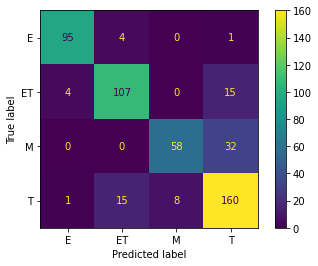

In [19]:
cm = confusion_matrix(ytest, ypred, labels=rf.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
cmplot.plot()
plt.show()

In [20]:
ytest.value_counts()

T     184
ET    126
E     100
M      90
Name: esrb_rating, dtype: int64

In [21]:
ypred

array(['T', 'E', 'M', 'E', 'ET', 'M', 'M', 'ET', 'E', 'ET', 'T', 'T',
       'ET', 'ET', 'T', 'M', 'M', 'T', 'E', 'ET', 'T', 'ET', 'ET', 'T',
       'ET', 'ET', 'ET', 'T', 'M', 'T', 'T', 'ET', 'ET', 'T', 'ET', 'T',
       'M', 'ET', 'E', 'T', 'T', 'T', 'ET', 'M', 'E', 'E', 'T', 'ET',
       'ET', 'ET', 'T', 'T', 'T', 'ET', 'T', 'ET', 'ET', 'T', 'T', 'T',
       'E', 'T', 'ET', 'E', 'M', 'ET', 'T', 'E', 'E', 'E', 'E', 'ET', 'T',
       'ET', 'T', 'ET', 'T', 'M', 'E', 'E', 'T', 'T', 'T', 'ET', 'E', 'T',
       'T', 'T', 'ET', 'ET', 'E', 'ET', 'T', 'T', 'T', 'E', 'ET', 'ET',
       'ET', 'T', 'E', 'E', 'T', 'T', 'T', 'E', 'M', 'T', 'T', 'T', 'T',
       'ET', 'ET', 'T', 'E', 'T', 'T', 'ET', 'T', 'E', 'T', 'T', 'ET',
       'E', 'T', 'T', 'E', 'ET', 'ET', 'T', 'ET', 'T', 'M', 'ET', 'E',
       'T', 'ET', 'T', 'ET', 'ET', 'E', 'T', 'T', 'T', 'M', 'T', 'M', 'T',
       'ET', 'ET', 'ET', 'E', 'ET', 'T', 'E', 'E', 'E', 'M', 'T', 'T',
       'ET', 'ET', 'ET', 'E', 'M', 'ET', 'M', 'E', 'ET', 'T'